<a href="https://colab.research.google.com/github/juancast-data-analyst/Latin-American-Development-Bank.Analyst/blob/main/S5_ladb_mobility_economy_project_student_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introducción

Como analista de datos, tu objetivo es **evaluar cómo la movilidad urbana se relaciona con la productividad económica en las principales ciudades latinoamericanas**.
Para ello trabajarás con datos reales de TomTom Traffic Index y OECD Cities, que deberás limpiar, combinar y analizar para identificar en qué ciudades conviene invertir en infraestructura de transporte.

## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de ambos datasets**.
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯Objetivo:**
Importar las librerías necesarias, cargar los archivos CSV en DataFrames y realizar una revisión preliminar para entender su contenido.

**Instrucciones:**
- Importa las librerías `pandas`, `numpy`, `seaborn` y `matplotlib.pyplot`.
- Carga los archivos usando `pd.read_csv()`:
  - `'/datasets/tomtom_traffic.csv'`
  - `/datasets/oecd_city_economy.csv` `.
- Guarda los DataFrames en las variables `traffic` y `eco`.
- Muestra las primeras 5 filas de cada DataFrame.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# importar librerías

In [ ]:
# cargar archivos
traffic = pd.read_csv('/datasets/tomtom_traffic.csv')
eco = pd.read_csv('/datasets/oecd_city_economy.csv')#completa el código

In [ ]:
traffic.head()# mostrar las primeras 5 filas de traffic

,Country,City,UpdateTimeUTC,JamsDelay,TrafficIndexLive,JamsLengthInKms,JamsCount,TrafficIndexWeekAgo,UpdateTimeUTCWeekAgo,TravelTimeLivePer10KmsMins,TravelTimeHistoricPer10KmsMins,MinsDelay
0,ARE,abu-dhabi,2025-01-13 04:01:30.001,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30.000,11.614767,10.265330,1.349437
1,ARE,abu-dhabi,2025-01-13 03:46:00.000,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001,11.003180,10.031544,0.971635
2,ARE,abu-dhabi,2025-01-13 02:46:30.000,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30.000,8.196278,8.196510,-0.000232
3,ARE,abu-dhabi,2025-01-13 01:46:30.001,8.2,2.0,4.1,2.0,2.0,2025-01-06 01:46:30.000,7.723808,7.899046,-0.175238
4,ARE,abu-dhabi,2025-01-13 00:01:30.000,1.1,1.0,0.2,1.0,1.0,2025-01-06 00:01:30.000,8.336363,8.604379,-0.268016


In [ ]:
eco.head()# mostrar las primeras 5 filas de eco

,Year,City,Country,City GDP/capita,Unemployment %,PM2.5 (μg/m³),Population (M)
0,2023,buenos-aires,Argentina,"15.782,00",6.2%,"15,2","15,30"
1,2023,sao-paulo,Brazil,"14.475,00",9.1%,"29,50","22,50"
2,2023,rio-de-janeiro,Brazil,"13.142,00",9.8%,"19,10","13,60"
3,2023,brasilia,Brazil,"15.999,00",8.3%,"13,50","4,70"
4,2023,salvador,Brazil,"8.761,00",13.1%,"16,00","3,90"


**Tip:** Si no usas `print()` la tabla se vera mejor.


---

## 🧩Paso 2: Explorar, limpiar y preparar los datos

Antes de combinar los datasets, inspecciona su estructura, tipos de datos, columnas y valores faltantes.
Anota las columnas que necesiten limpieza y luego estandariza los nombres de columnas.

### 2.1 Explorar la estructura y tipos de datos

**🎯Objetivo:**
Identificar columnas con tipos incorrectos, distribución y nulos, anotar las columnas que requieren conversión.

**Instrucciones:**

- Usa `.info()` para conocer la estructura de ambos DataFrames.
- Muestra los primeros 3 renglones de cada DF.
- Identifica si los detalles de cada DF estan bien o si requieren correcciones y escribe tus conclusiones en el bloque Markdown.
  - ¿Hay columnas que requieren conversión?¿ Cuáles son? ¿Que tipo de dato ienen y cuál deberían de tener?
  - ¿Hay datos ausentes en alguna columna?


In [ ]:
# Examinar la estructura de traffic
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004464 entries, 0 to 1004463
Data columns (total 12 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Country                         1004464 non-null  object 
 1   City                            1004464 non-null  object 
 2   UpdateTimeUTC                   1004464 non-null  object 
 3   JamsDelay                       1004464 non-null  float64
 4   TrafficIndexLive                1004464 non-null  float64
 5   JamsLengthInKms                 1004464 non-null  float64
 6   JamsCount                       1004464 non-null  float64
 7   TrafficIndexWeekAgo             1004464 non-null  float64
 8   UpdateTimeUTCWeekAgo            1004464 non-null  object 
 9   TravelTimeLivePer10KmsMins      1004464 non-null  float64
 10  TravelTimeHistoricPer10KmsMins  1004464 non-null  float64
 11  MinsDelay                       1004464 non-null  float64
dtype

En la estructura del DF traffic, se observa que:
- Las columnas `UpdateTimeUTC` y `UpdateTimeUTCWeekAgo` son de tipo Texto (object) y deberian ser tipo Fecha.
- Las columnas `Country` y `City` son de tipo Texto (object), todas las demás son tipo número decimal (float64)
- El DF traffic cuenta con 1004464 registros o entradas y 12 Columnas.
- De acuerdo con la columna Non_Null Count de la info de traffic no hay valores faltantes en ninguna columna

In [ ]:
# Examinar la estructura de eco
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             30 non-null     int64 
 1   City             30 non-null     object
 2   Country          30 non-null     object
 3   City GDP/capita  30 non-null     object
 4   Unemployment %   30 non-null     object
 5   PM2.5 (μg/m³)    30 non-null     object
 6   Population (M)   30 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.8+ KB


En la estructura del DF eco, se observa que:
- Las columnas `City GDP/capita`, `Unemployment %`, `PM2.5 (μg/m³)`, `Population (M)` son de tipo Texto (object) y deben ser tipo número (Float o Int64).
- El Dataset cuenta con 30 registros o filas y 7 columnas.
- De acuerdo con la columna Non_Null Count de la info de eco no hay valores faltantes en ninguna de las columnas

### 2.2 Renombrar columnas

**🎯Objetivo:**
Estandarizar los nombres de columnas para evitar errores y facilitar la unión de los datasets.

**Instrucciones:**

- Cambia los nombres de las columnas para que tengan el formato `snake_case`.
    - `Country` → `country`
    - `UpdateTimeUTC` → `update_time_utc`
- Verifica que los cambios se hayan aplicado correctamente usando `.columns`.


In [ ]:
# Estandarizar los nombres de las columnas de traffic
#tu código aquí
traffic.columns=['country','city','update_time_utc','jams_delay','traffic_index_live','jams_length_kms','jams_count','traffic_index_week_ago','update_time_utc_week_ago','travel_time_live_per_10kms_mins','travel_time_hist_per_10kms_mins','mins_delay']

# verificar cambios
traffic.columns

Index(['country', 'city', 'update_time_utc', 'jams_delay',
       'traffic_index_live', 'jams_length_kms', 'jams_count',
       'traffic_index_week_ago', 'update_time_utc_week_ago',
       'travel_time_live_per_10kms_mins', 'travel_time_hist_per_10kms_mins',
       'mins_delay'],
      dtype='object')

In [ ]:
# Estandarizar los nombres de las columnas de eco
eco.columns=['year','city','country','city_gdp_capita','unemployment_pct','pm_2.5(μg/m³)','population_m']
#tu código aquí

# verificar cambios
eco.columns

Index(['year', 'city', 'country', 'city_gdp_capita', 'unemployment_pct',
       'pm_2.5(μg/m³)', 'population_m'],
      dtype='object')


### 2.3 Corregir formatos numéricos y de fecha

**🎯Objetivo:**
Asegurar que las columnas de fechas y valores numéricos estén en formatos correctos para permitir análisis, cálculos y comparaciones precisas.

**Instrucciones:**

- Convierte las columnas de fecha de `traffic` a formato `datetime`. Haz el cambio a prueba de errores.
- En el dataset `eco`, limpia los valores numéricos:
    - En `city_gdp_capita`: elimina separadores de miles (`.`) y reemplaza las comas (`','`) por puntos (`'.'`) antes de convertir a tipo `float`.
    - En `unemployment_pct`: elimina el símbolo de porcentaje (`%`) y reemplaza las comas (`','`) por puntos (`'.'`) antes de convertir a tipo `float`.
    - En `population_m`: reemplaza las comas (`','`) por puntos (`'.'`) antes de convertir a tipo `float`.
- Finalmente, crea una nueva columna llamada `population` multiplicando `population_m` por 1,000,000 para obtener la población total.


<details>
<summary>Haz clic para ver la pista</summary>
para eliminar símbolos, puedes reemplazarlos por un texto vacío.

In [ ]:
# Convertir las columnas de traffic a tipo fecha con pd.to_datetime()
traffic['update_time_utc'] = pd.to_datetime(traffic['update_time_utc'],errors='coerce') #tu código aquí
traffic['update_time_utc_week_ago'] = pd.to_datetime(traffic['update_time_utc_week_ago'],errors='coerce')#tu código aquí

# verificar el cambio
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004464 entries, 0 to 1004463
Data columns (total 12 columns):
 #   Column                           Non-Null Count    Dtype         
---  ------                           --------------    -----         
 0   country                          1004464 non-null  object        
 1   city                             1004464 non-null  object        
 2   update_time_utc                  1004464 non-null  datetime64[ns]
 3   jams_delay                       1004464 non-null  float64       
 4   traffic_index_live               1004464 non-null  float64       
 5   jams_length_kms                  1004464 non-null  float64       
 6   jams_count                       1004464 non-null  float64       
 7   traffic_index_week_ago           1004464 non-null  float64       
 8   update_time_utc_week_ago         1004464 non-null  datetime64[ns]
 9   travel_time_live_per_10kms_mins  1004464 non-null  float64       
 10  travel_time_hist_per_10kms_min

In [ ]:
# Limpia separadores y convierte columnas numéricas en eco
eco['city_gdp_capita'] = (
    eco['city_gdp_capita']
    .astype(str)
    .str.replace('.', '')
    .str.replace(',', '.')
    .astype(float)
)
eco['unemployment_pct'] = (
    eco['unemployment_pct']
    .astype(str)
    .str.replace('%','')
    .str.replace(',','.')
    .astype(float)
)
eco['population_m'] = (
    eco['population_m']
    .astype(str)
    .str.replace(',','.')
    .astype(float)
)
# Calcula la población total en unidades absolutas (Multiplica * 1000000)
eco['population_m'] = eco['population_m']*1000000

# verificar el cambio
eco.info()
eco.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              30 non-null     int64  
 1   city              30 non-null     object 
 2   country           30 non-null     object 
 3   city_gdp_capita   30 non-null     float64
 4   unemployment_pct  30 non-null     float64
 5   pm_2.5(μg/m³)     30 non-null     object 
 6   population_m      30 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.8+ KB


,year,city,country,city_gdp_capita,unemployment_pct,pm_2.5(μg/m³),population_m
0,2023,buenos-aires,Argentina,15782.0,6.2,"15,2",15300000.0
1,2023,sao-paulo,Brazil,14475.0,9.1,"29,50",22500000.0
2,2023,rio-de-janeiro,Brazil,13142.0,9.8,"19,10",13600000.0



---

## 🧩Paso 3: Extraer año y filtrar

Extraer el año permite filtrar la información y trabajar solo con el período más reciente y relevante.

### 3.1 Extraer columna año y filtrar 2024

**🎯Objetivo**
Identificar el año de cada registro y mantener solo los registros del 2024.

**Intrucciones**

- Como el DataFrame `traffic` no tiene una columna de año, utiliza el atributo `.dt.year` sobre su columna de fecha para crear una nueva columna llamada `year`.
- Filtra las filas donde el año sea **2024**.
- Utiliza `.copy()` para crear dos nuevos DataFrames (`traffic_2024` y `eco_2024`) para evitar modificar el dataset original.

In [ ]:
# Extraer el año de las fechas en update_time_utc
traffic['year'] = traffic['update_time_utc'].dt.year

# Verificar cambio
traffic.head(3)

,country,city,update_time_utc,jams_delay,traffic_index_live,jams_length_kms,jams_count,traffic_index_week_ago,update_time_utc_week_ago,travel_time_live_per_10kms_mins,travel_time_hist_per_10kms_mins,mins_delay,year
0,ARE,abu-dhabi,2025-01-13 04:01:30.001,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30.000,11.614767,10.265330,1.349437,2025
1,ARE,abu-dhabi,2025-01-13 03:46:00.000,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001,11.003180,10.031544,0.971635,2025
2,ARE,abu-dhabi,2025-01-13 02:46:30.000,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30.000,8.196278,8.196510,-0.000232,2025


In [ ]:
# Filtra los registros del año 2024
traffic_2024 = traffic[traffic['year']==2024].copy()
eco_2024 = eco[eco['year']==2024].copy()

# Revisar dataframes nuevos
display(traffic_2024.head())
display(eco_2024.head())


,country,city,update_time_utc,jams_delay,traffic_index_live,jams_length_kms,jams_count,traffic_index_week_ago,update_time_utc_week_ago,travel_time_live_per_10kms_mins,travel_time_hist_per_10kms_mins,mins_delay,year
302,ARE,abu-dhabi,2024-12-31 23:01:30.000,12.9,5.0,2.5,5.0,2.0,2024-12-24 23:01:30.001,8.560399,8.519634,0.040765,2024
303,ARE,abu-dhabi,2024-12-31 22:01:30.000,136.0,21.0,20.6,32.0,3.0,2024-12-24 22:01:30.000,10.355732,9.049445,1.306286,2024
304,ARE,abu-dhabi,2024-12-31 21:16:30.000,455.2,31.0,40.4,72.0,4.0,2024-12-24 21:01:30.000,11.456878,9.305174,2.151704,2024
305,ARE,abu-dhabi,2024-12-31 20:01:00.001,399.4,27.0,38.0,75.0,6.0,2024-12-24 20:01:30.001,11.670062,9.952811,1.717252,2024
306,ARE,abu-dhabi,2024-12-31 19:46:00.000,366.4,28.0,39.8,82.0,9.0,2024-12-24 19:01:00.000,11.686322,10.008469,1.677853,2024


,year,city,country,city_gdp_capita,unemployment_pct,pm_2.5(μg/m³),population_m
15,2024,buenos-aires,Argentina,18117.0,7.2,"14,50",15400000.0
16,2024,sao-paulo,Brazil,14703.0,8.5,"28,00",22600000.0
17,2024,rio-de-janeiro,Brazil,13349.0,9.2,"18,40",13700000.0
18,2024,brasilia,Brazil,16251.0,7.8,"12,80",4800000.0
19,2024,salvador,Brazil,8899.0,12.4,"15,20",3900000.0



---

## 🧩Paso 4: Analizar y resumir datos de movilidad

Como el dataset de tráfico contiene **múltiples registros por ciudad**. En esta parte, calcularás los promedios anuales por ciudad para simplificar el análisis y obtener una visión más clara de las tendencias generales.

### 4.1 Calcular promedios de tráfico por ciudad

**🎯Objetivo:**
Obtener una vista consolidada del tráfico promedio por ciudad y año, para analizar patrones generales sin depender de datos diarios.

**Instrucciones**

- Agrupa los datos por `city`, `country` y `year`.
- Calcula el promedio **solo de las métricas de tráfico más relevantes**: como `jams_delay`, `traffic_index_live`, `jams_length_kms`, `jams_count`, `mins_delay`, y tiempos de viaje (`travel_time_live_per_10kms_mins` y `travel_time_hist_per_10kms_mins`).
- Guarda el resultado como `traffic_city_year_2024`, mantén las columnas como variables (no índices).


<details>
<summary>Haz clic para ver la pista</summary>
Usa ".agg()" para aplicar funciones de promedio. Al final, reinicia el índice para mantener las columnas de la agrupación como variables (no índices).

In [ ]:
# Calcular los  promedios de trafico por ciudad, país y año
traffic_city_year_2024 = traffic_2024.groupby(['city','country','year'])[['jams_delay', 'traffic_index_live', 'jams_length_kms', 'jams_count', 'mins_delay', 'travel_time_live_per_10kms_mins', 'travel_time_hist_per_10kms_mins']].mean().reset_index().sort_values(by="jams_delay",ascending=False)# tu código aqui

# Mostrar resultado
traffic_city_year_2024.head()

,city,country,year,jams_delay,traffic_index_live,jams_length_kms,jams_count,mins_delay,travel_time_live_per_10kms_mins,travel_time_hist_per_10kms_mins
221,mexico-city,MEX,2024,2833.057892,34.218190,389.239265,594.969392,1.855542,21.809092,19.953550
352,tokyo,JPN,2024,2152.574357,36.805059,373.069734,518.809420,0.698152,22.443778,21.745626
246,new-york,USA,2024,2133.400000,28.210388,398.227892,544.474902,1.396351,18.505043,17.108691
200,london,GBR,2024,2050.703662,29.230166,287.632868,471.795554,1.325160,17.714139,16.388979
211,manila,PHL,2024,1741.493381,66.129402,246.858082,341.881205,2.469894,27.134629,24.664734


### 🧠 **Momento de reflexión**

¡Excelente trabajo hasta aquí!

Ahora que ya tienes los promedios anuales por ciudad, es momento de **observarlos** con atención.

Piensa:

- ¿Cuál crees que tiene el mayor tiempo promedio de tráfico?
- ¿Será una ciudad de **Europa**, de **Latinoamérica** o de **otra región** del mundo?

Para descubrirlo, ejecuta esta línea de código:

`traffic_city_year_2024.sort_values(["jams_delay"], ascending=False)`


🔍 Observa qué ciudad aparece en los primeros lugares.

¿Te sorprenden los resultados? , ¿Coinciden con lo que imaginabas?

In [ ]:
traffic_city_year_2024.sort_values(["jams_delay"], ascending=False)# tu código aquí

,,,jams_delay,traffic_index_live,jams_length_kms,jams_count,mins_delay,travel_time_live_per_10kms_mins,travel_time_hist_per_10kms_mins
city,country,year,,,,,,,
mexico-city,MEX,2024,2833.057892,34.218190,389.239265,594.969392,1.855542,21.809092,19.953550
tokyo,JPN,2024,2152.574357,36.805059,373.069734,518.809420,0.698152,22.443778,21.745626
new-york,USA,2024,2133.400000,28.210388,398.227892,544.474902,1.396351,18.505043,17.108691
london,GBR,2024,2050.703662,29.230166,287.632868,471.795554,1.325160,17.714139,16.388979
manila,PHL,2024,1741.493381,66.129402,246.858082,341.881205,2.469894,27.134629,24.664734
...,...,...,...,...,...,...,...,...,...
dunedin,NZL,2024,4.651175,15.430809,0.712315,1.591384,0.633294,16.226009,15.592715
uppsala,SWE,2024,4.194486,13.939168,0.656368,1.349672,0.501802,15.746717,15.244916
fujairah,ARE,2024,4.025959,10.907719,0.731910,1.373006,0.194951,11.662590,11.467639


La ciudad con el mayor tiempo promedio de tráfico es mexico_city, ciudad ubicada en latinoameria


---

## 🧩Paso 5: Unir movilidad y economía

Combinar datasets te permite analizar cómo se relacionan los indicadores económicos con los de movilidad.

### 5.1 Unir tráfico (tabla principal) con indicadores económicos

**🎯Objetivo:**
Combinar la información de tráfico y economía en un solo DataFrame para analizar cómo las condiciones económicas se relacionan con la movilidad urbana.

**Instrucciones**
- Selecciona solo las **columnas relevantes** de cada dataset (por ejemplo, variables clave de tráfico y de economía).
- Usa `.copy()` al crear subconjuntos para evitar modificar el dataset original.
- Une ambos DataFrames y define como **claves de unión** a `city` y `year`.
- Mantén solo las ciudades y años presentes en ambos datasets.
- Guarda el resultado en una nueva variable llamada `merged` y muestra las primeras 5 filas.


<details>
<summary>Haz clic para ver la pista</summary>
Aplica una unión de tipo "inner" para mantener las ciudades y años presentes en ambos datasets.

In [ ]:
# Seleccionar columnas clave de tráfico y economía
left_cols = ['city','country','year','jams_delay','traffic_index_live','jams_count','mins_delay','travel_time_live_per_10kms_mins']

right_cols = ['year','city','country','city_gdp_capita','unemployment_pct','pm_2.5(μg/m³)','population_m']

# Usar .copy() para crear los dos nuevos datasets reducidos
traffic_2024_small = traffic_city_year_2024[left_cols].copy()
eco_2024_small = eco_2024[right_cols].copy()

# Unir datasets
merged = pd.merge(traffic_2024_small,eco_2024_small, on=['city','year'],how='inner')# tu código aquí

# Mostrar las primeras 5 filas
merged.head(20)
# tu código aquí



,city,country_x,year,jams_delay,traffic_index_live,jams_count,mins_delay,travel_time_live_per_10kms_mins,country_y,city_gdp_capita,unemployment_pct,pm_2.5(μg/m³),population_m
0,mexico-city,MEX,2024,2833.057892,34.218190,594.969392,1.855542,21.809092,Mexico,21111.0,3.2,"22,30",22100000.0
1,sao-paulo,BRA,2024,1729.189270,26.877932,431.470460,1.129026,20.801836,Brazil,14703.0,8.5,"28,00",22600000.0
2,bogota,COL,2024,1141.552364,37.614273,230.566550,1.699628,24.992185,Colombia,11442.0,10.0,"17,60",11300000.0
3,lima,PER,2024,1052.292789,31.031277,213.453519,1.506305,25.674261,Peru,13472.0,6.5,"19,70",11200000.0
4,santiago,CHL,2024,629.865318,20.155352,153.095300,0.627445,17.031310,Chile,2277.0,7.8,"21,30",7100000.0
5,buenos-aires,ARG,2024,571.089593,17.756012,137.359860,0.416566,17.907916,Argentina,18117.0,7.2,"14,50",15400000.0
6,rio-de-janeiro,BRA,2024,466.064706,25.162963,123.891939,0.361302,17.137320,Brazil,13349.0,9.2,"18,40",13700000.0
7,belo-horizonte,BRA,2024,263.047879,19.428946,68.805422,0.487228,18.304538,Brazil,11124.0,9.5,"16,80",6100000.0
8,curitiba,BRA,2024,183.469274,14.954545,46.898164,0.139965,17.258700,Brazil,12381.0,8.2,"13,50",3700000.0
9,porto-alegre,BRA,2024,139.382830,17.687254,39.813403,0.194195,16.166684,Brazil,11801.0,8.7,"14,20",4300000.0



---

## 🧩Paso 6: Visualización y análisis de relaciones

Ahora que tienes un dataset limpio y unificado, es momento de **visualizar patrones**.
Los gráficos te ayudarán a entender cómo se relacionan las variables económicas con las de movilidad urbana.

### 6.1 Visualizar relaciones entre economía y tráfico

**🎯Objetivo:**
Analizar visualmente la distribución y la relación entre indicadores de tráfico y economía en 2024, para identificar posibles patrones o tendencias generales entre ambas variables.

**Instrucciones**
- Usa las librerías `seaborn` y `matplotlib.pyplot` para generar los gráficos.
- Visualiza la distribución del **tráfico** (`jams_delay`) mediante:
    - **Boxplot** → para observar la media, mediana y detectar valores atípicos.
- Visualiza la distribución de la **economía** (`city_gdp_capita`) mediante:
    - **Histograma** → para analizar la forma de la distribución y el valor promedio del PIB per cápita.
- Finalmente, **compara ambas variables**, para observar si existe alguna relación entre ellas, haciendo un solo gráfico de barras donde aparezcan ambos indicadores.
- Recuerda agregar título y etiquetas a los ejes de tus gráficos.
- Observa y comenta los patrones, valores extremos o posibles relaciones que identifiques.

**Tip:** Dentro de los parentesis del boxplot, agrega `showmeans=True` para ver la media en el gráfico.

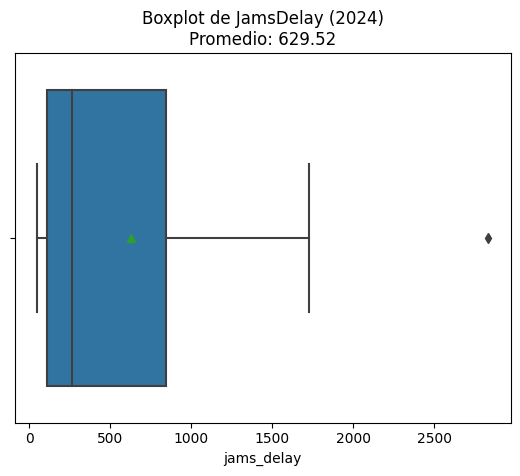

In [ ]:

# Crear boxplot para observar el comportamiento de los minutos de congestion JamsDelay
# crea tu gráfico

# obtener promedio para mostrarlo en título
mean_value = merged['jams_delay'].mean()
sns.boxplot(data=merged, x='jams_delay', showmeans=True)
plt.title(f'Boxplot de JamsDelay (2024)\nPromedio: {mean_value:.2f}')
plt.show()



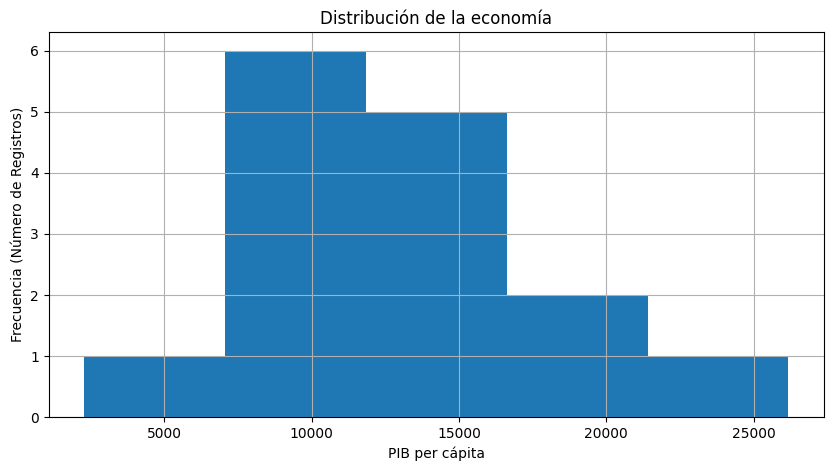

In [ ]:
# Crear histograma para ver la distribución de la economía (city_gdp_capita)
merged['city_gdp_capita'].hist(bins=5,figsize=(10,5))
plt.title(f'Distribución de la economía')
plt.xlabel(f'PIB per cápita')
plt.ylabel(f'Frecuencia (Número de Registros)')
plt.show()



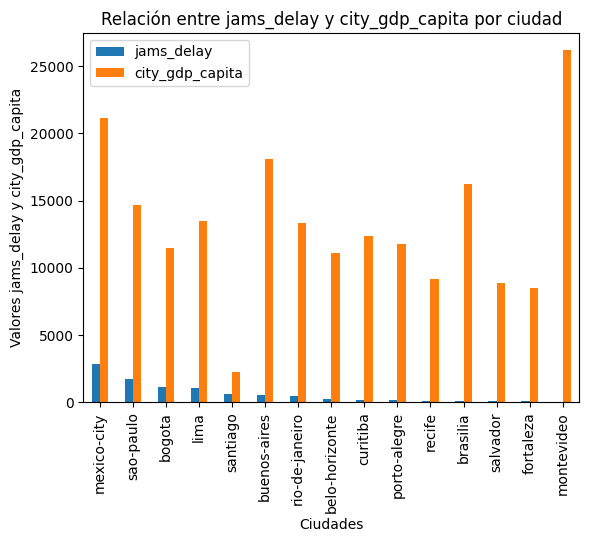

In [ ]:

# Gráfico de barras para comparar jams_delay y city_gdp_capita por ciudad
merged.plot(kind='bar', x='city', y=['jams_delay', 'city_gdp_capita'])
plt.title(f'Relación entre jams_delay y city_gdp_capita por ciudad')
plt.ylabel(f'Valores jams_delay y city_gdp_capita')
plt.xlabel(f'Ciudades')
plt.xticks(rotation=90)
plt.show()


**Tip:** Antes del `plt.show()` agrega el código `plt.xticks(rotation=90)` para rotar las etiquetas del eje X en 90 grados.

### 🧠 **Reflexiona**
Excelente trabajo llegando a esta etapa del análisis. Antes de avanzar, revisa tus gráficos, tómate un momento para pensar:

* ¿Las ciudades con mayor PIB per cápita también presentan más congestión?

* ¿O sucede lo contrario, o no existe una relación clara?

Escribe tus comentarios: No existe una relación clara, por ejemplo ciudad de mexico presenta el jeams_delay (Retraso total (en minutos) de 2833 provocado por la congestión en todas las vías monitoreadas) mas alto de todas las ciudades analizadas, sin embargo, el city_gdp_capita (Producto Interno Bruto per cápita en dólares (USD). Refleja el nivel de productividad económica por habitante.) de esta ciudad es mayor a 20000, el segundo mejor solo por detras de Montevideo que tiene un jeams_delay bajo y no visisble en el grafico (50).

Buenos Aires es la tercera Ciudad Top en el city_gdp_capita mayor a 15000 y un jeams_delay de 571, en contraste con bogota que tiene city_gdp_capita menor a 15000 y un jeams_delay de 1141

Podemos concluir que el PIB no es directamente proporcional a la congestion vehicular, no se puede identificar una relacion clara


---

## 🧩Paso 7: Exportar y documentar resultados

En esta etapa final consolidarás todo tu trabajo: guardarás el dataset limpio y crearás un resumen que documente los resultados del proyecto.

### 7.1 Guardar dataset final

**🎯Objetivo:**
Generar un CSV limpio, reproducible y con columnas relevantes para análisis posterior.

**Instrucciones**

- Exporta el DataFrame `merged` con el nombre: `ladb_mobility_economy_2024_clean.csv`
- Usa `index=False` para no incluir el índice.


In [ ]:
# Exporta el dataset final como CSV
merged.to_csv("ladb_mobility_economy_2024_clean.csv", index=False)

Para poder ver o descargar el archivo generado:   
En el menú lateral que esta a la izquierda, ve hasta la parte de abajo, a la sección de **Exportar dataset** para más información.


---

## ✅ Entregables

1. **Notebook `.ipynb`** con todas las celdas (código + comentarios).
2. **CSV final**: `ladb_mobility_economy_2024_clean.csv`.
3. **Resumen ejecutivo breve** en Markdown (3–5 párrafos).



---

# 🧾 Resumen ejecutivo (plantilla)

> Completa este resumen al finalizar el análisis. Mantén 3–5 párrafos cortos, claros y accionables.

**Contexto & objetivo:**  
- Responde la pregunta central del análisis: ¿qué relación existe entre la movilidad urbana (congestión, tiempos de viaje) y la productividad económica (PIB per cápita)?

*No existe una relación clara, por ejemplo ciudad de mexico presenta el jeams_delay (Retraso total (en minutos) de 2833 provocado por la congestión en todas las vías monitoreadas) mas alto de todas las ciudades analizadas, sin embargo, el city_gdp_capita (Producto Interno Bruto per cápita en dólares (USD). Refleja el nivel de productividad económica por habitante.) de esta ciudad es mayor a 20000, el segundo mejor solo por detras de Montevideo que tiene un jeams_delay bajo y no visisble en el grafico (50).
  
- Explica brevemente las variables clave utilizadas y su relevancia para la toma de decisiones.

*Entre las variables clave esta la poblacion, que de acuerdo a los datos entre mas poblacion tenga la ciudad mayor congestion vehicular se observa, no obstante, no guarda relacion con la productividad economica por habitante a pesar de que el porcentaje de desempleo en algunas ciudades es de 2 digitos, pudiendo agrabar la situación de movilidad.

**Cobertura de datos:**  
- Especifica los años analizados, número de ciudades y países incluidos.

*Se analizo el año 2024, 14 ciudades y 7 paises como Mexico, Brasil, Colombia, Peru, Chile, Argentina y Uruguay

**Metodología (alto nivel):**  
- Describe los procesos principales: limpieza de datos (formatos, estandarización de columnas).

*Importación de librerías (pandas, numpy, seaborn y matplotlib.pyplot). Cargado de datasets. Exploración de  estructura y tipos de datos. Limpieza de  datos  como: corregir formatos (convertir columnas de fecha a datetime, limpiar valores numéricos) y estandarización de columnas (cambiar los nombres de las columnas para que tengan el formato snake_case). Fiiltrar año de interés, crear una columna de año en traffic y filtrar el año 2024 en los 2 datasets.

- Explica la agregación por ciudad–año y el uso de una unión INNER para integrar tráfico y economía.

*Se calcula el promedio de métricas de trafico relevantes y tiempos de viajes del dataset de traffic agrupando por country-city-año, se usa .reset_index() para mantener las columnas como variables y se organiza con .sort_values() de manera descendente. Posteriormente unimos tráfico con indicadores económicos usando .merge() con las claves de unión city y year y usando INNER con el fin de mantener solo las ciudades y años presentes en ambos datasets.

- Menciona las validaciones visuales empleadas (distribuciones, outliers, tendencias generales).

*Se realiza Boxplot , para observar la media, mediana y detectar valores atípicos, así como Histograma, para analizar la forma de la distribución y el valor promedio del PIB per cápita. Al final, se comparan ambas variables por ciudad para observar si hay relación entre ellas con un gráfico de barras.

**Hallazgos iniciales:**  
- Resume los patrones más importantes entre índices de tráfico y PIB per cápita.

*Uruguay y Ciudad de México son las 2 Ciudades con mayor PIB per cápita, por encima de 20000, no obstante el índice de trafico es mucho mayor en ciudad de Mexico (Mismo nivel económico ≠ Mismo nivel de tráfico).

- Destaca anomalías u outliers que podrían requerir revisión adicional o un análisis más profundo.

*El PIB per cápita de Santiago es muy bajo en relación con las demás ciudades, además de que es la quinta de catorce ciudades con mayor tiempo de viaje. Presenta alta congestión con baja productividad económica.
*Ciudad de México presenta el tiempo de viaje más alto de todas las ciudades analizadas, sin embargo, el PIB per es mayor a 20000, el segundo mejor solo por detrás de Montevideo que tiene un tiempo de viaje bajo y no visible en el gráfico. Así también podemos mencionar que a menor desempleo mayor congestión


**Recomendaciones**  
Aterriza los hallazgos en acciones: ciudades prioritarias, necesidad de validar fuentes, requerimiento de análisis adicionales, o propuestas de inversión.

*El PIB per cápita NO es el único factor que determina la congestión. Por ejemplo, Uruguay podría ser un modelo de ciudad próspera con tráfico eficiente, o ser objeto de estudio para conocer que otros factores influyen en la productividad como (infraestructura, planificación urbana, políticas de transporte).


- ¿Qué ciudad : Bogotá, Lima o Buenos Aires o alguna otra en particular, muestra la mayor correlación significativa entre altos niveles de congestión vehicular y bajos indicadores de productividad económica, sugiriendo ser una ciudad prioritaria para inversión en infraestructura de transporte?

*Santiago podría ser una ciudad prioritaria para: *Inversión en infraestructura de transporte, *Programas de desarrollo económico, *Políticas integradas de movilidad urbana
